In [8]:
#Installation
!pip install ultralytics opencv-python


0: 448x640 30 cars, 1 bus, 2 trucks, 254.6ms
Speed: 6.2ms preprocess, 254.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


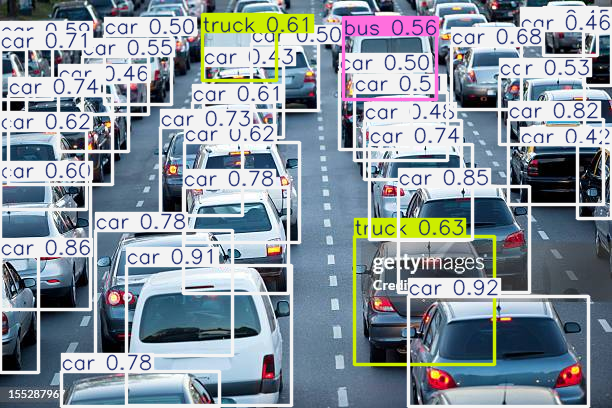

In [13]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Read image

img = cv2.imread("/content/traffic.jpg")

results = model(img, conf=0.4)  # Perform inference
# Visualize output
annotated_img = results[0].plot()

cv2_imshow(annotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#object count
detections = results[0].boxes.data # detected objects

class_names = model.names  #  class names
# Count objects by class
object_counts = {}
for *xyxy, conf, cls in detections:
    class_id = int(cls)
    class_name = class_names[class_id]
    object_counts[class_name] = object_counts.get(class_name, 0) + 1



In [16]:
# Print the counts
print("Detected object counts:")
for name, count in object_counts.items():
    print(f"- {name}: {count}")

Detected object counts:
- car: 30
- truck: 2
- bus: 1
